1-0: Use a list comprehension to create a list of the squares of the numbers between 10 and 20, including the endpoints

In [1]:
squares = [x**2 for x in range(1,21)]
print(squares)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]


1-1: Write a Python program to print out the first N numbers in the Fibonacci
sequence. The program should ask the user for N, and should
require that N be greater than 2.

In [2]:
def fibonacci(n):
    seq = [1,1]
    if n > 2:
        for i in range(n-2):
            seq.append(seq[-1]+seq[-2])
    return seq

limit = int(input("Enter N: "))
print(fibonacci(limit))

[1, 1]


1-2: For the model used in introductory physics courses, a projectile thrown vertically at some initial velocity $v_i$ has position $y(t) = y_i + v_it - \frac{1}{2}gt^2$, where $g = 9.8 m/s^2$. Write a Python program that creates two lists, one containing time data (50 data points over 5 seconds) and the other containing the corresponding vertical position data for this projectile. The program should ask the user for the initial height $y_i$ and initial velocity $v_i$, and should print a nicely-formatted table of the list values after it has calculated them.

(-20.0, 20.0)

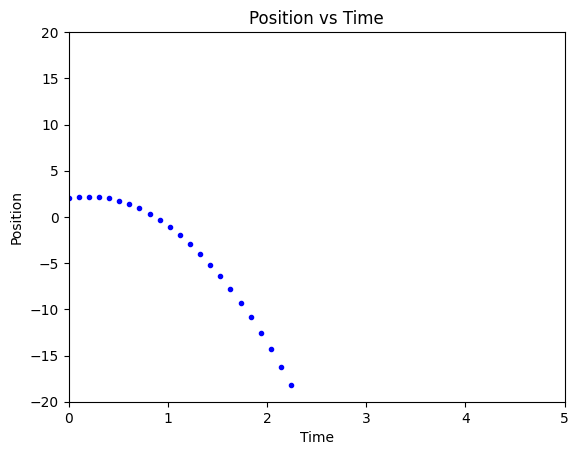

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def positions(y,v,g=9.81,timePoints=50,time=5):
    t=np.linspace(0,time,timePoints)
    y = y + v*t - 0.5*g*t**2
    return t,y

yi = float(input("Enter the initial height in meters: "))
vi = float(input("Enter the initial velocity in meters per second: "))

time,pos = positions(yi,vi)

graph = plt.plot(time,pos,'b.')
plt.title('Position vs Time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xlim(0, 5)
plt.ylim(-20, 20)

1-3: The energy levels for a quantum particle in a three-dimensional rectangular box of dimensions $\{L_1, L_2, L_3\}$ are given by
$$
E_{n1,n2,n3} = \frac{\hbar^2 \pi^2}{2m}[\frac{n_1^2}{L_1^2}+\frac{n_2^2}{L_2^2}+\frac{n_3^2}{L_3^2}]
$$
Where the n's are integers greater than or equal to one. Write a program that will calculate, and list in order of increasing energy, the values of the n's for the 10 lowest different energy levels, given a box for which $L_2 = 2L_1$ and $L_3 = 4L_1$

In [4]:
import numpy as np

hbar = 6.626 * 10**-34
em = 9.109 * 10**-31

def lowestEnergyLevels(l1):
    k = (hbar**2 * np.pi**2)/(2*em)
    elist = []
    l2 = l1*2
    l3 = l1*4
    nlist = [1,2,3,4,5]
    for n1 in nlist:
        for n2 in nlist:
            for n3 in nlist:
                e = n1**2/l1**2 + n2**2/l2**2 + n3**2/l3**2
                e*= k
                elist.append((e,n1,n2,n3))
    elist.sort()
    return elist[:5]

lowestEnergyLevels(1)

[(3.121772300638143e-36, 1, 1, 1),
 (3.5677397721578774e-36, 1, 1, 2),
 (4.311018891357435e-36, 1, 1, 3),
 (4.905642186717081e-36, 1, 2, 1),
 (5.3516096582368154e-36, 1, 1, 4)]

1-4: Write a function for
$$
sinc(x) \equiv \frac{sinx}{x}
$$

In [5]:
def sinc(x):
    if x == 0:
        return np.inf
    else:
        return np.sin(x)/x

print(sinc(np.pi))
print(np.sinc(1))

3.8981718325193755e-17
3.8981718325193755e-17


1-5: Write a function for the nth triangular number

In [6]:
def triNum(n):
    res = 0
    for i in range(n+1):
        res += i
    return res

print(triNum(6))

21


1-6: Write a function that determines whether a number is prime or not

In [7]:
%%time
from math import *
def isPrime(n):
    if n == 0 or n == 1:
        return False
    for i in range(2,floor(sqrt(n))+1):
        if n%i == 0:
            return False
    return True

print(isPrime(23))

True
CPU times: total: 0 ns
Wall time: 74.6 μs


1-7: Write a Python program to make an N x N multiplication table and write this table to a file. Each row in the table should be a single line of the file, and the numbers in the row should be tab-delimited. Write the program so that it accepts two parameters when invoked: the size N of the multiplication table and the filename of the desired output file.

In [28]:
import pandas as pd

def timesTable(n, filename):
    table = pd.DataFrame([[i*j for j in range(1,n+1)] for i in range(1,n+1)])
    table.index = [i for i in range(1,n+1)]
    table.columns = [i for i in range(1,n+1)]
    table.to_csv(filename+'.csv', sep='\t')

timesTable(12, 'table')

1-8: Write a program that takes a multi-digit integer and prints out its digits in English. Bonus point if the program takes care of ones/tens/hundreds/thousands properly.

In [29]:
def number_to_words(n):
    ones = ["", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
    teens = ["", "Eleven", "Twelve", "Thirteen", "Fourteen", "Fifteen", "Sixteen", "Seventeen", "Eighteen", "Nineteen"]
    tens = ["", "Ten", "Twenty", "Thirty", "Forty", "Fifty", "Sixty", "Seventy", "Eighty", "Ninety"]
    thousands = ["", "Thousand", "Million", "Billion"]

    def words(num):
        if num == 0:
            return "Zero"
        elif num < 10:
            return ones[num]
        elif 10 < num < 20:
            return teens[num - 10]
        elif num < 100:
            return tens[num // 10] + (" " + ones[num % 10] if num % 10 != 0 else "")
        elif num < 1000:
            return ones[num // 100] + " Hundred" + (" " + words(num % 100) if num % 100 != 0 else "")
        else:
            for i, word in enumerate(thousands):
                if num < 1000 ** (i + 1):
                    return words(num // (1000 ** i)) + " " + word + (" " + words(num % (1000 ** i)) if num % (1000 ** i) != 0 else "")

    return words(n)

number = int(input("Enter a multi-digit integer: "))
print(number_to_words(number))

One Hundred Twenty Three
